In [1]:
import pandas as pd
import talib
import matplotlib.pyplot as plt

In [2]:
aapl_df = pd.read_csv(
    r'C:\Users\Kaleb\OneDrive\Documents\AC\Week1\Data\yfinance_data\AMZN_historical_data.csv',
    parse_dates=['Date'],  # Parse the 'Date' column as datetime objects
    index_col='Date'       # Set 'Date' as the DataFrame index
)

In [3]:
aapl_df = aapl_df.sort_index()

In [4]:
aapl_df['SMA_20'] = talib.SMA(aapl_df['Close'], timeperiod=20)

In [5]:
aapl_df['RSI'] = talib.RSI(aapl_df['Close'], timeperiod=14)

In [6]:
macd, macd_signal, macd_hist = talib.MACD(
    aapl_df['Close'],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

In [7]:
aapl_df['MACD'] = macd
aapl_df['MACD_Signal'] = macd_signal

# Step 4: Display the last 10 rows with indicators to check results
print(aapl_df[['Close', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal']].tail(10))

                 Close    SMA_20        RSI      MACD  MACD_Signal
Date                                                              
2024-07-17  187.929993  193.5515  43.449125  1.892177     3.037522
2024-07-18  183.750000  193.5985  38.016792  0.949405     2.619899
2024-07-19  183.130005  193.4500  37.272419  0.150489     2.126017
2024-07-22  182.550003  193.1235  36.551404 -0.523425     1.596128
2024-07-23  186.410004  193.1655  44.277037 -0.737536     1.129395
2024-07-24  180.830002  192.8900  37.221397 -1.342010     0.635114
2024-07-25  179.850006  192.2020  36.132394 -1.878483     0.132395
2024-07-26  182.500000  191.4345  41.146719 -2.065994    -0.307283
2024-07-29  183.199997  190.9320  42.432437 -2.133520    -0.672530
2024-07-30  181.710007  190.1575  40.408843 -2.280971    -0.994218


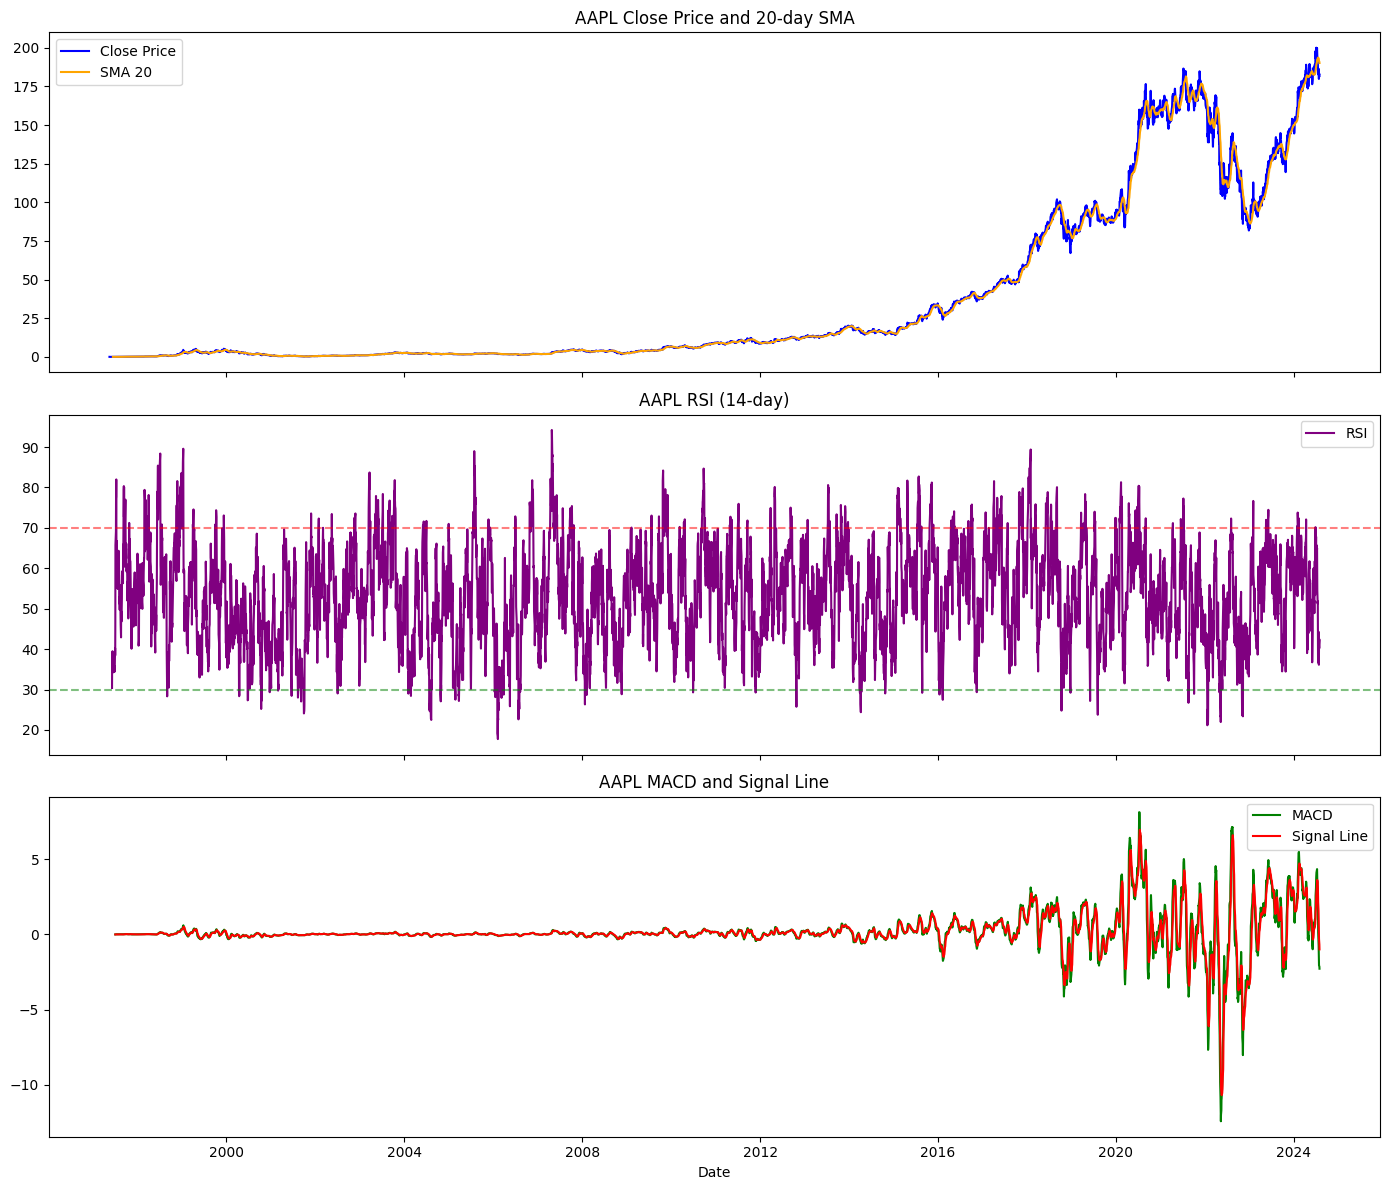

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot Close price and SMA_20
axs[0].plot(aapl_df.index, aapl_df['Close'], label='Close Price', color='blue')
axs[0].plot(aapl_df.index, aapl_df['SMA_20'], label='SMA 20', color='orange')
axs[0].set_title('AAPL Close Price and 20-day SMA')
axs[0].legend()

# Plot RSI with typical overbought/oversold lines
axs[1].plot(aapl_df.index, aapl_df['RSI'], label='RSI', color='purple')
axs[1].axhline(70, color='red', linestyle='--', alpha=0.5)
axs[1].axhline(30, color='green', linestyle='--', alpha=0.5)
axs[1].set_title('AAPL RSI (14-day)')
axs[1].legend()

# Plot MACD and MACD Signal
axs[2].plot(aapl_df.index, aapl_df['MACD'], label='MACD', color='green')
axs[2].plot(aapl_df.index, aapl_df['MACD_Signal'], label='Signal Line', color='red')
axs[2].set_title('AAPL MACD and Signal Line')
axs[2].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()